In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [2]:
df_full = pd.read_csv('data/tweets_users_september.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [3]:
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [4]:
df_full.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,...,following,likes,url,verified,geotext,city,country,iso3,month,day
0,2020-09-10 22:49:47,DishPodcast,Planthropology_,0,0,1,I’ll neuralink your resume straight into Musk’...,NaN,NaN,NaN,...,1985.0,7554.0,https://anchor.fm/petridish,0.0,<geotext.geotext.GeoText object at 0x7f43b4578...,Los Angeles,United States,USA,9,10
1,2018-08-16 03:59:43,FarandWidecom,NaN,0,6,45,Here's how to avoid throngs of tourists at the...,NaN,NaN,NaN,...,16.0,2.0,https://www.farandwide.com/,0.0,<geotext.geotext.GeoText object at 0x7f43b4557...,NaN,NaN,NaN,8,16
2,2020-09-10 22:41:04,Planthropology_,DishPodcast,1,0,1,Sign me up for the Indentured Spaceman program!,NaN,NaN,NaN,...,740.0,4479.0,https://www.planthropologypod.com,0.0,<geotext.geotext.GeoText object at 0x7f43b45c5...,NaN,NaN,NaN,9,10
3,2020-09-10 14:17:33,WafflesMaple,NaN,5,5,9,"A little late, but for our contribution to #Po...",NaN,@beholdertonoone @CheaperDungeon @knightsofbar...,#PodRevDay,...,540.0,12003.0,https://linktr.ee/WafflesMapleSyrup,0.0,<geotext.geotext.GeoText object at 0x7f43b4578...,NaN,NaN,NaN,9,10
4,2020-09-09 21:41:37,realnealveglio,VerbalDiorama,0,0,2,,NaN,NaN,NaN,...,2698.0,16864.0,https://www.nealveglio.com,0.0,<geotext.geotext.GeoText object at 0x7f43b4557...,Oxford,United Kingdom,GBR,9,9


In [5]:
df_full.shape

(1703, 27)

In [6]:
df_full = df_full.drop_duplicates()

In [7]:
df_full.shape

(1642, 27)

In [8]:
df_full.username.value_counts()[:10]

PodRevDay         321
stephfuccio       223
musciguy           56
Podchaser          37
LizWilcox79        36
Infectious_Pod     29
LiqeaH             28
FitVeritas         22
themenasaur        19
DimensionPod       18
Name: username, dtype: int64

In [9]:
screen = ['PodRevDay', 'stephfuccio', 'FarandWidecom']

df_full = df_full[~df_full.username.isin(screen)]

In [10]:
df_full.username.value_counts()[:10]

musciguy          56
Podchaser         37
LizWilcox79       36
Infectious_Pod    29
LiqeaH            28
FitVeritas        22
themenasaur       19
OracleofDusk      18
DimensionPod      18
curichildpod      18
Name: username, dtype: int64

In [11]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followers)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweets)
avg_favorite = np.mean(df_full.favorites)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participted in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Averge Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

1088: Tweets using the hashtag #PodRevDay.
358: People have participted in #PodRevDay.
575,430: Followers of participants in #PodRevDay.
16: Minimum number of countries with participants.
5.74: Averge Number of people liking a tweet about #PodRevDay
2.12: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [12]:
!mkdir plots

mkdir: cannot create directory ‘plots’: File exists


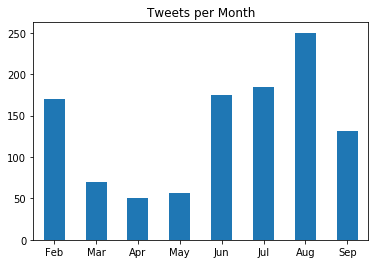

In [13]:
tweets_per_month = df_full.groupby('month').count().sort_values('month', ascending=True).reset_index()

months = ('Feb', "Mar", "Apr", 'May', "Jun", "Jul", 'Aug', "Sep")
positions = (0, 1, 2, 3, 4, 5, 6, 7)

ax = tweets_per_month.plot.bar(x='month', 
                          y='date', 
                          title="Tweets per Month",
                          legend=None)
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

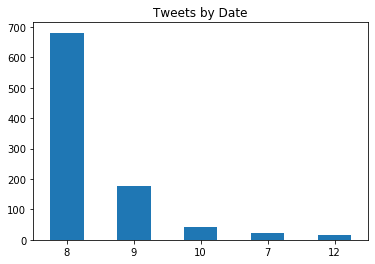

In [14]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

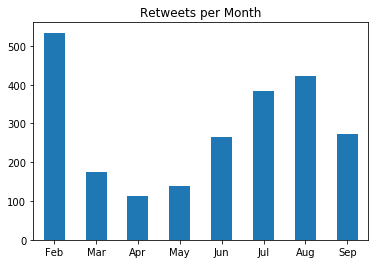

In [15]:
retweets_per_month = df_full.groupby(['month'])['retweets'].sum().sort_index(ascending=True)
ax3 = retweets_per_month.plot.bar(title="Retweets per Month")
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax3.figure.savefig('plots/retweets_per_month.png')

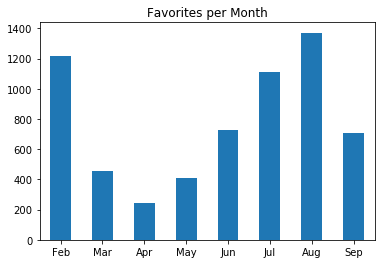

In [16]:
favorites_per_month = df_full.groupby(['month'])['favorites'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

In [17]:
table = df_full.groupby(['month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [18]:
table_wide = table.pivot(index='month',
                               columns='country',
                               values=['total']).fillna(method='ffill', axis=0)

table_wide = (table_wide.append(pd.Series(name=1))
              .sort_index())

/home/evan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


In [19]:
table_wide.fillna(0, inplace=True)
table_wide

total                                                     \
country Australia Canada Ecuador France Germany India Italy Malaysia   
month                                                                  
1             0.0    0.0     0.0    0.0     0.0   0.0   0.0      0.0   
2             5.0    2.0     0.0    0.0     0.0   0.0   6.0      2.0   
3             5.0    2.0     1.0    0.0     0.0   0.0   6.0      2.0   
4             6.0    2.0     1.0    0.0     0.0   0.0   6.0      2.0   
5             6.0    3.0     1.0    0.0     1.0   0.0   6.0      2.0   
6             6.0    4.0     1.0    0.0     2.0   3.0   6.0      2.0   
7             6.0   10.0     1.0    2.0     4.0   3.0   6.0      2.0   
8             6.0   29.0     1.0    2.0     4.0   3.0   9.0      2.0   
9             6.0   34.0     1.0    2.0     4.0   3.0   9.0      2.0   

                                                                             \
country New Zealand Nigeria Poland South Africa Sweden United Arab Emirates   
month                                                                         
1               0.0     0.0    0.0          0.0    0.0                  0.0   
2               3.0     0.0    0.0          0.0    0.0                  0.0   
3               4.0     0.0    0.0          0.0    0.0                  0.0   
4               4.0     0.0    0.0          0.0    0.0                  0.0   
5               5.0     0.0    0.0          0.0    0.0                  0.0   
6               5.0     3.0    1.0          6.0    0.0                  0.0   
7               6.0     4.0    4.0          6.0    0.0                  0.0   
8               6.0     4.0    5.0          6.0    2.0                  3.0   
9               6.0     4.0    5.0          6.0    2.0                  3.0   

                                      
country United Kingdom United States  
month                                 
1                  0.0           0.0  
2                  6.0          40.0  
3                 12.0          69.0  
4                 14.0          90.0  
5                 21.0         115.0  
6                 48.0         184.0  
7                 69.0         229.0  
8                 72.0         331.0  
9                 85.0         360.0

In [20]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [21]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [22]:
mon_num = list(range(1,10))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

months_dic = dict(zip(mon_num, mon_names))
table_wide.rename(index=months_dic, inplace=True)
table_wide

,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,South Africa,Sweden,United Arab Emirates,United Kingdom,United States
month,,,,,,,,,,,,,,,,
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
February,5.0,2.0,0.0,0.0,0.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,40.0
February,5.0,2.0,0.0,0.0,0.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,40.0
March,5.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,69.0
March,5.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,69.0
April,6.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,14.0,90.0
April,6.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,14.0,90.0
May,6.0,3.0,1.0,0.0,1.0,0.0,6.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,21.0,115.0


In [23]:
bcr.bar_chart_race(df=table_wide,
                   period_length=500,
                   title ="Tweets Per Country",
                   filename="plots/podrevday.gif")

In [24]:
bcr.bar_chart_race(df=table_wide,
                   period_length=1250,
                   filename="plots/podrevday.mp4")